## Gadfly

Carlos Lizama

### Outline:

1. Introduction
2. The grammar of graphics
3. Plotting arrays and functions.
4. Plotting DataFrames
5. Pros and Cons.

### Introduction

1. *Leland Wilkinson (2005)*   created the *Grammar of Graphics* to describe deep features that underlie all statistical graphics.

> The grammar tells us that a statistical graphic is a mapping from data to aesthetic attributes (color, shape, size) of geometric objects (points, lines, bars). The plot may also contain statistical transformation of the data and is drawn on a specific coordinate system. Faceting can be used to generate that same plot for different subsets of dataset. It is the combination of these independent components that make up a graphic.  
    
2. *Hadley Wickham (2009)* builds on Wilkinson's grammar and adapts it within R. He develops the **ggplot2** package.
3. Gadfly is a package that implements the Grammar of Graphics in Julia, based mainly on ggplot2.

### The grammar of graphics

The main components of the grammar:
1. The **Data** that we want to visualize and a set of asthetic **mapping**s describing how variables in the data are mapped to *aethetic attributes* which define how the data should be perceived.
2. Geometric object, **geom**s for short, represent what we actually see on the plot: points, lines, polygons, etc.
3. Statistical transformation, **stats** for shor, summarize data in many useful ways. For instance, the binning to create histograms. Stats are optional, but very useful.
4. The **scale**s map values in the data space to values in an aesthetic space, whether it be color, size or shape. Scales also draw legend or axes.
5. A coordinate system, **coor** for short, describes how data coordinates are mapped to the plane of the graphic. It also provides axes and gridlines to make it possible to read the graph.  Examples of coordinate system are the Cartesian cordinate system and the polar coordinate system.
6. A **facet**ing specification describes how to break up the data into subsets and how to display those subsets as small multiples.


#### The Grammar of Graphics in Julia

In Julia, we can speficy:
1. aethetics, scales, coordinates, guides, geometries, stats.

#### Data
* The Data is supplied in form of DataFrame.
* Although the DataFrame is optional.

#### Statistics
* Statistics are functions taking as input one or more aesthetics, operating on those values, then output to one or more aesthetics. For example, drawing of boxplots typically uses the boxplot statistic (Stat.boxplot) that takes as input the x and y aesthetic, and outputs the middle, and upper and lower hinge, and upper and lower fence aesthetics.

#### Scales
* Scales, similarly to statistics, apply a transformation to the original data, typically mapping one aesthetic to the same aesthetic, while retaining the original value, e.g. Scale.x_log

#### Geometries
* Geometries are responsible for actually doing the drawing. A geometry takes as input one or more aesthetics, and used data bound to these aesthetics to draw things.

#### Guides
* Very similar to geometries are guides, which draw graphics supporting the actual visualization, such as axis ticks and labels and color keys. The major distinction is that geometries always draw within the rectangular plot frame, while guides have some special layout considerations.

In [1]:
using Gadfly


## Examples Gadfly

### Plotting arrays and anonymous functions

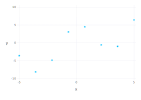

In [2]:
# plot arrays

x = collect(linspace(-5,5,8))
y = 5*cos(x)+x
plot(x=x, y=y)

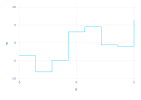

In [3]:
# line options: point, line, smooth. Use Geom.
x = collect(linspace(-5,5,8))
y = 5*cos(x)+x
plot(x=x, y=y, Geom.step())  # optional arguments: direction :vh :hv

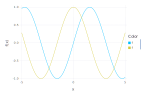

In [4]:
# plot anonymous fuctions
plot([sin, cos], -5, 5)

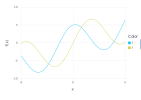

In [5]:
plot([x->5*cos(x) + x, x->5*sin(x) + x], -5, 5)

In [6]:
f(x) = 5*cos(x) + x

f (generic function with 1 method)

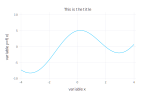

In [7]:
# customize plots: title, axis, labels, ...
plot(f, -4, 4, Guide.xlabel("variable x"), Guide.ylabel("variable y=f(x)"), Guide.title("This is the title"))

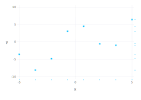

In [8]:
# more on Guide, xrug, yrug. 
plot(x=x, y=y, Guide.xrug, Guide.yrug)

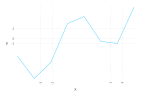

In [9]:
# more on guide: ticks
xt = [-3, -2, 3, 4]
yt = [-1, 0, 2]
plot(x=x, y=y, Geom.line, Guide.xticks(ticks=xt, orientation=:vertical), Guide.yticks(ticks=yt))
# optional: label: true or false.

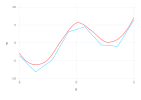

In [10]:
# more than one plot at the same time: layers
y1 = y+1
plot(layer(x=x, y=y, Geom.line), layer(x=x, y=y1, Geom.smooth, Theme(default_color=colorant"red")))

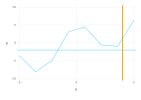

In [11]:
# others: Geom: vline, hline.
plot(x=x, y=y, xintercept=[4], yintercept=[-2], Geom.line, Geom.hline(), Geom.vline(color=colorant"orange", size=1mm))

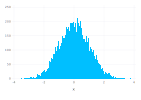

In [12]:
# histograms
x0 = randn(10000)
plot(x=x0, Geom.histogram)

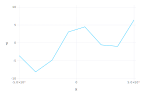

In [13]:
# Scale. x_continuous, y_continuous, x_log, x_log10, etc. Same for y.
plot(x=x, y=y, Scale.x_continuous(format=:scientific), Geom.line)

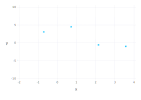

In [14]:
# Coord.cartesian xmin, xmax
plot(x=x, y=y, Coord.cartesian(xmin=-2,xmax=4))

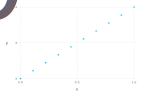

In [15]:
# Scale. x_continuous, y_continuous, x_log, x_log10, etc. Same for y.
x1 = collect(linspace(0,1,10))
y1 = exp(x1)
plot(x=x1, y=y1, Scale.y_log())

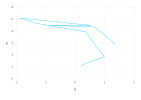

In [16]:
# Other features: Geom.path
n = 10
xjumps = randn(n)
yjumps = randn(n)
plot(x=cumsum(xjumps),y=cumsum(yjumps),Geom.path())

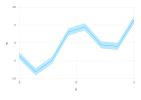

In [17]:
# Other features: Geom.ribbon
ymin = y - 1
ymax = y + 1
plot(x=x, y=y, ymax=ymax, ymin=ymin, Geom.line, Geom.ribbon)

### Plotting Datasets

In [18]:
using RDatasets
using DataFrames

In [19]:
Data1 = dataset("car","Salaries")
# The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and 
# Professors in a college in the U.S.

397x6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ YrsSincePhD │ YrsService │ Sex      │
┝━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━┥
│ 1   │ "Prof"      │ "B"        │ 19          │ 18         │ "Male"   │
│ 2   │ "Prof"      │ "B"        │ 20          │ 16         │ "Male"   │
│ 3   │ "AsstProf"  │ "B"        │ 4           │ 3          │ "Male"   │
│ 4   │ "Prof"      │ "B"        │ 45          │ 39         │ "Male"   │
│ 5   │ "Prof"      │ "B"        │ 40          │ 41         │ "Male"   │
│ 6   │ "AssocProf" │ "B"        │ 6           │ 6          │ "Male"   │
│ 7   │ "Prof"      │ "B"        │ 30          │ 23         │ "Male"   │
│ 8   │ "Prof"      │ "B"        │ 45          │ 45         │ "Male"   │
│ 9   │ "Prof"      │ "B"        │ 21          │ 20         │ "Male"   │
│ 10  │ "Prof"      │ "B"        │ 18          │ 18         │ "Female" │
│ 11  │ "AssocProf" │ "B"        │ 12          │ 8          │ "Male"   │
⋮
│ 386 │ "Prof"      │ "A"        │ 15          │ 9          │ "Male"   │
│ 387 │ "Prof"      │ "A"        │ 29          │ 27         │ "Male"   │
│ 388 │ "Prof"      │ "A"        │ 29          │ 15         │ "Male"   │
│ 389 │ "Prof"      │ "A"        │ 38          │ 36         │ "Male"   │
│ 390 │ "Prof"      │ "A"        │ 33          │ 18         │ "Male"   │
│ 391 │ "Prof"      │ "A"        │ 40          │ 19         │ "Male"   │
│ 392 │ "Prof"      │ "A"        │ 30          │ 19         │ "Male"   │
│ 393 │ "Prof"      │ "A"        │ 33          │ 30         │ "Male"   │
│ 394 │ "Prof"      │ "A"        │ 31          │ 19         │ "Male"   │
│ 395 │ "Prof"      │ "A"        │ 42          │ 25         │ "Male"   │
│ 396 │ "Prof"      │ "A"        │ 25          │ 15         │ "Male"   │
│ 397 │ "AsstProf"  │ "A"        │ 8           │ 4          │ "Male"   │

│ Row │ Salary │
┝━━━━━┿━━━━━━━━┥
│ 1   │ 139750 │
│ 2   │ 173200 │
│ 3   │ 79750  │
│ 4   │ 115000 │
│ 5   │ 141500 │
│ 6   │ 97000  │
│ 7   │ 175000 │
│ 8   │ 147765 │
│ 9   │ 119250 │
│ 10  │ 129000 │
│ 11  │ 119800 │
⋮
│ 386 │ 114330 │
│ 387 │ 139219 │
│ 388 │ 109305 │
│ 389 │ 119450 │
│ 390 │ 186023 │
│ 391 │ 166605 │
│ 392 │ 151292 │
│ 393 │ 103106 │
│ 394 │ 150564 │
│ 395 │ 101738 │
│ 396 │ 95329  │
│ 397 │ 81035  │

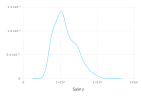

In [20]:
# density
plot(Data1, x="Salary", Geom.density)   # Geom.density = Geom.line, Stat.density

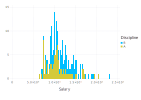

In [21]:
# histogram
plot(Data1, x="Salary", Geom.histogram, color="Discipline") # Geom.histogram = Geom.bar, Stat.histogram

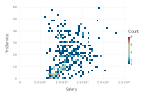

In [22]:
# 2D histogram
plot(Data1, x="Salary", y="YrsService", Geom.histogram2d(xbincount=40, ybincount=40))

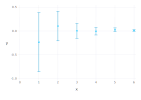

In [23]:
# error bars
using Distributions

sds = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
n = 10
ys = [mean(rand(Normal(0, sd), n)) for sd in sds]
ymins = ys .- (1.96 * sds / sqrt(n))
ymaxs = ys .+ (1.96 * sds / sqrt(n))

plot(x=1:length(sds), y=ys, ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar)

In [24]:
Data2 = dataset("datasets","USArrests")
# This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in 
# each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

50x5 DataFrames.DataFrame
│ Row │ State            │ Murder │ Assault │ UrbanPop │ Rape │
┝━━━━━┿━━━━━━━━━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━━┿━━━━━━━━━━┿━━━━━━┥
│ 1   │ "Alabama"        │ 13.2   │ 236     │ 58       │ 21.2 │
│ 2   │ "Alaska"         │ 10.0   │ 263     │ 48       │ 44.5 │
│ 3   │ "Arizona"        │ 8.1    │ 294     │ 80       │ 31.0 │
│ 4   │ "Arkansas"       │ 8.8    │ 190     │ 50       │ 19.5 │
│ 5   │ "California"     │ 9.0    │ 276     │ 91       │ 40.6 │
│ 6   │ "Colorado"       │ 7.9    │ 204     │ 78       │ 38.7 │
│ 7   │ "Connecticut"    │ 3.3    │ 110     │ 77       │ 11.1 │
│ 8   │ "Delaware"       │ 5.9    │ 238     │ 72       │ 15.8 │
│ 9   │ "Florida"        │ 15.4   │ 335     │ 80       │ 31.9 │
│ 10  │ "Georgia"        │ 17.4   │ 211     │ 60       │ 25.8 │
│ 11  │ "Hawaii"         │ 5.3    │ 46      │ 83       │ 20.2 │
⋮
│ 39  │ "Rhode Island"   │ 3.4    │ 174     │ 87       │ 8.3  │
│ 40  │ "South Carolina" │ 14.4   │ 279     │ 48       │ 22.5 │
│ 41  │ "South Dakota"   │ 3.8    │ 86      │ 45       │ 12.8 │
│ 42  │ "Tennessee"      │ 13.2   │ 188     │ 59       │ 26.9 │
│ 43  │ "Texas"          │ 12.7   │ 201     │ 80       │ 25.5 │
│ 44  │ "Utah"           │ 3.2    │ 120     │ 80       │ 22.9 │
│ 45  │ "Vermont"        │ 2.2    │ 48      │ 32       │ 11.2 │
│ 46  │ "Virginia"       │ 8.5    │ 156     │ 63       │ 20.7 │
│ 47  │ "Washington"     │ 4.0    │ 145     │ 73       │ 26.2 │
│ 48  │ "West Virginia"  │ 5.7    │ 81      │ 39       │ 9.3  │
│ 49  │ "Wisconsin"      │ 2.6    │ 53      │ 66       │ 10.8 │
│ 50  │ "Wyoming"        │ 6.8    │ 161     │ 60       │ 15.6 │

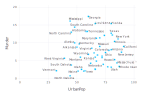

In [25]:
# labels
plot(Data2, x="UrbanPop", y="Murder", label="State" , Geom.label, Geom.point)

In [26]:
Data3 = dataset("datasets","chickwts")
# An experiment was conducted to measure and compare the effectiveness of various feed supplements 
# on the growth rate of chickens.

71x2 DataFrames.DataFrame
│ Row │ Weight │ Feed        │
┝━━━━━┿━━━━━━━━┿━━━━━━━━━━━━━┥
│ 1   │ 179    │ "horsebean" │
│ 2   │ 160    │ "horsebean" │
│ 3   │ 136    │ "horsebean" │
│ 4   │ 227    │ "horsebean" │
│ 5   │ 217    │ "horsebean" │
│ 6   │ 168    │ "horsebean" │
│ 7   │ 108    │ "horsebean" │
│ 8   │ 124    │ "horsebean" │
│ 9   │ 143    │ "horsebean" │
│ 10  │ 140    │ "horsebean" │
│ 11  │ 309    │ "linseed"   │
⋮
│ 60  │ 368    │ "casein"    │
│ 61  │ 390    │ "casein"    │
│ 62  │ 379    │ "casein"    │
│ 63  │ 260    │ "casein"    │
│ 64  │ 404    │ "casein"    │
│ 65  │ 318    │ "casein"    │
│ 66  │ 352    │ "casein"    │
│ 67  │ 359    │ "casein"    │
│ 68  │ 216    │ "casein"    │
│ 69  │ 222    │ "casein"    │
│ 70  │ 283    │ "casein"    │
│ 71  │ 332    │ "casein"    │

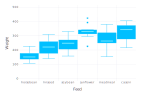

In [27]:
# boxplot
plot(Data3, x="Feed", y="Weight", Geom.boxplot)

In [28]:
# Data by categories.
Data4 = dataset("Ecdat","Wages1")
# a panel of 595 observations from 1976 to 1982

3294x4 DataFrames.DataFrame
│ Row  │ Exper │ Sex      │ School │ Wage    │
┝━━━━━━┿━━━━━━━┿━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━━┥
│ 1    │ 9     │ "female" │ 13     │ 6.3153  │
│ 2    │ 12    │ "female" │ 12     │ 5.47977 │
│ 3    │ 11    │ "female" │ 11     │ 3.64217 │
│ 4    │ 9     │ "female" │ 14     │ 4.59334 │
│ 5    │ 8     │ "female" │ 14     │ 2.41816 │
│ 6    │ 9     │ "female" │ 14     │ 2.09406 │
│ 7    │ 8     │ "female" │ 12     │ 5.512   │
│ 8    │ 10    │ "female" │ 12     │ 3.54843 │
│ 9    │ 12    │ "female" │ 10     │ 5.81823 │
│ 10   │ 7     │ "female" │ 12     │ 3.82778 │
│ 11   │ 10    │ "female" │ 14     │ 6.73689 │
⋮
│ 3283 │ 9     │ "male"   │ 9      │ 3.59347 │
│ 3284 │ 6     │ "male"   │ 8      │ 4.34279 │
│ 3285 │ 4     │ "male"   │ 10     │ 5.79039 │
│ 3286 │ 6     │ "male"   │ 8      │ 2.07699 │
│ 3287 │ 9     │ "male"   │ 10     │ 6.12445 │
│ 3288 │ 4     │ "male"   │ 10     │ 2.85625 │
│ 3289 │ 5     │ "male"   │ 8      │ 5.512   │
│ 3290 │ 6     │ "male"   │ 9      │ 4.28711 │
│ 3291 │ 5     │ "male"   │ 9      │ 7.14519 │
│ 3292 │ 6     │ "male"   │ 9      │ 4.53878 │
│ 3293 │ 10    │ "male"   │ 8      │ 2.90911 │
│ 3294 │ 7     │ "male"   │ 7      │ 4.15397 │

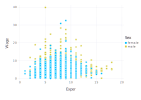

In [29]:
plot(Data4, x="Exper", y="Wage", color="Sex")

In [30]:
Data5 = dataset("Zelig", "approval")
# The (approximately) quarterly approval rating for the President of the United States from the first month of 2001
# to the last month of 2005.

65x8 DataFrames.DataFrame
│ Row │ Month │ Year │ Approve │ Disapprove │ Unsure │ SeptOct2001 │ IraqWar │
┝━━━━━┿━━━━━━━┿━━━━━━┿━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━┥
│ 1   │ 2     │ 2001 │ 58.67   │ 23.67      │ 17.67  │ 0           │ 0       │
│ 2   │ 3     │ 2001 │ 58.0    │ 26.67      │ 15.33  │ 0           │ 0       │
│ 3   │ 4     │ 2001 │ 60.5    │ 29.5       │ 10.0   │ 0           │ 0       │
│ 4   │ 5     │ 2001 │ 55.0    │ 33.33      │ 11.67  │ 0           │ 0       │
│ 5   │ 6     │ 2001 │ 54.0    │ 34.0       │ 12.0   │ 0           │ 0       │
│ 6   │ 7     │ 2001 │ 56.5    │ 34.0       │ 9.5    │ 0           │ 0       │
│ 7   │ 8     │ 2001 │ 56.0    │ 35.0       │ 9.0    │ 0           │ 0       │
│ 8   │ 9     │ 2001 │ 75.67   │ 18.33      │ 6.0    │ 1           │ 0       │
│ 9   │ 10    │ 2001 │ 88.0    │ 9.0        │ 3.0    │ 1           │ 0       │
│ 10  │ 11    │ 2001 │ 87.0    │ 8.67       │ 4.33   │ 0           │ 0       │
│ 11  │ 12    │ 2001 │ 86.0    │ 10.5       │ 3.5    │ 0           │ 0       │
⋮
│ 54  │ 7     │ 2005 │ 47.33   │ 49.0       │ 3.67   │ 0           │ 0       │
│ 55  │ 8     │ 2005 │ 43.75   │ 52.5       │ 3.75   │ 0           │ 0       │
│ 56  │ 9     │ 2005 │ 44.0    │ 52.75      │ 3.25   │ 0           │ 0       │
│ 57  │ 10    │ 2005 │ 40.75   │ 56.25      │ 3.0    │ 0           │ 0       │
│ 58  │ 11    │ 2005 │ 38.33   │ 57.33      │ 4.33   │ 0           │ 0       │
│ 59  │ 12    │ 2005 │ 42.25   │ 54.0       │ 3.75   │ 0           │ 0       │
│ 60  │ 1     │ 2006 │ 43.0    │ 53.67      │ 3.67   │ 0           │ 0       │
│ 61  │ 2     │ 2006 │ 39.67   │ 57.0       │ 3.33   │ 0           │ 0       │
│ 62  │ 3     │ 2006 │ 36.5    │ 59.5       │ 4.5    │ 0           │ 0       │
│ 63  │ 4     │ 2006 │ 35.67   │ 60.67      │ 3.67   │ 0           │ 0       │
│ 64  │ 5     │ 2006 │ 37.0    │ 57.67      │ 5.0    │ 0           │ 0       │
│ 65  │ 6     │ 2006 │ 40.0    │ 55.0       │ 5.0    │ 0           │ 0       │

│ Row │ AvgPrice │
┝━━━━━┿━━━━━━━━━━┥
│ 1   │ 144.975  │
│ 2   │ 140.925  │
│ 3   │ 155.16   │
│ 4   │ 170.175  │
│ 5   │ 161.625  │
│ 6   │ 142.06   │
│ 7   │ 142.075  │
│ 8   │ 152.15   │
│ 9   │ 131.54   │
│ 10  │ 117.05   │
│ 11  │ 108.6    │
⋮
│ 54  │ 229.0    │
│ 55  │ 248.62   │
│ 56  │ 290.325  │
│ 57  │ 271.68   │
│ 58  │ 225.675  │
│ 59  │ 218.5    │
│ 60  │ 231.56   │
│ 61  │ 228.0    │
│ 62  │ 242.475  │
│ 63  │ 274.2    │
│ 64  │ 290.68   │
│ 65  │ 288.45   │

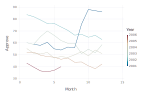

In [31]:
plot(Data5, x="Month",  y="Approve", color="Year", Geom.line)

In [32]:
Data6 = dataset("Zelig","macro")
# Selected macroeconomic indicators for many countries.

350x6 DataFrames.DataFrame
│ Row │ Country         │ Year │ GDP     │ Unem    │ CapMob │ Trade   │
┝━━━━━┿━━━━━━━━━━━━━━━━━┿━━━━━━┿━━━━━━━━━┿━━━━━━━━━┿━━━━━━━━┿━━━━━━━━━┥
│ 1   │ "United States" │ 1966 │ 5.11114 │ 3.8     │ 0      │ 9.62291 │
│ 2   │ "United States" │ 1967 │ 2.27728 │ 3.8     │ 0      │ 9.98355 │
│ 3   │ "United States" │ 1968 │ 4.7     │ 3.6     │ 0      │ 10.0891 │
│ 4   │ "United States" │ 1969 │ 2.8     │ 3.5     │ 0      │ 10.4359 │
│ 5   │ "United States" │ 1970 │ -0.2    │ 4.9     │ 0      │ 10.4954 │
│ 6   │ "United States" │ 1971 │ 3.1     │ 5.9     │ 0      │ 11.2783 │
│ 7   │ "United States" │ 1972 │ 5.4     │ 5.6     │ 0      │ 11.2177 │
│ 8   │ "United States" │ 1973 │ 5.7     │ 4.9     │ 0      │ 11.767  │
│ 9   │ "United States" │ 1974 │ -0.9    │ 5.6     │ 0      │ 13.7726 │
│ 10  │ "United States" │ 1975 │ -0.8    │ 8.5     │ 0      │ 17.4233 │
│ 11  │ "United States" │ 1976 │ 4.7     │ 7.7     │ 0      │ 16.5221 │
⋮
│ 339 │ "Japan"         │ 1979 │ 5.2     │ 2.1     │ -1     │ 22.0022 │
│ 340 │ "Japan"         │ 1980 │ 4.4     │ 2.0     │ 0      │ 26.3161 │
│ 341 │ "Japan"         │ 1981 │ 3.9     │ 2.2     │ 0      │ 31.2153 │
│ 342 │ "Japan"         │ 1982 │ 2.8     │ 2.4     │ 0      │ 32.5188 │
│ 343 │ "Japan"         │ 1983 │ 3.2     │ 2.6     │ 0      │ 32.8061 │
│ 344 │ "Japan"         │ 1984 │ 5.0     │ 2.7     │ 0      │ 29.7358 │
│ 345 │ "Japan"         │ 1985 │ 4.7     │ 2.6     │ 0      │ 30.6541 │
│ 346 │ "Japan"         │ 1986 │ 2.5     │ 2.8     │ 0      │ 29.1616 │
│ 347 │ "Japan"         │ 1987 │ 4.4     │ 2.9     │ 0      │ 21.9099 │
│ 348 │ "Japan"         │ 1988 │ 5.7     │ 2.5     │ 0      │ 21.7124 │
│ 349 │ "Japan"         │ 1989 │ 4.7     │ 2.26475 │ 0      │ 23.1288 │
│ 350 │ "Japan"         │ 1990 │ 5.2     │ 2.099   │ 0      │ 20.0003 │

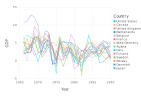

In [33]:
plot(Data6, x = "Year", y="GDP", color="Country", Geom.line)

In [34]:
Data7 = dataset("vcd","Suicide")
# Data from Heuer (1979) on suicide rates in West Germany classified by age, sex, and method of suicide.

306x6 DataFrames.DataFrame
│ Row │ Freq │ Sex      │ Method     │ Age │ AgeGroup │ Method2  │
┝━━━━━┿━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━┿━━━━━━━━━━┿━━━━━━━━━━┥
│ 1   │ 4    │ "male"   │ "poison"   │ 10  │ "10-20"  │ "poison" │
│ 2   │ 0    │ "male"   │ "cookgas"  │ 10  │ "10-20"  │ "gas"    │
│ 3   │ 0    │ "male"   │ "toxicgas" │ 10  │ "10-20"  │ "gas"    │
│ 4   │ 247  │ "male"   │ "hang"     │ 10  │ "10-20"  │ "hang"   │
│ 5   │ 1    │ "male"   │ "drown"    │ 10  │ "10-20"  │ "drown"  │
│ 6   │ 17   │ "male"   │ "gun"      │ 10  │ "10-20"  │ "gun"    │
│ 7   │ 1    │ "male"   │ "knife"    │ 10  │ "10-20"  │ "knife"  │
│ 8   │ 6    │ "male"   │ "jump"     │ 10  │ "10-20"  │ "jump"   │
│ 9   │ 0    │ "male"   │ "other"    │ 10  │ "10-20"  │ "other"  │
│ 10  │ 348  │ "male"   │ "poison"   │ 15  │ "10-20"  │ "poison" │
│ 11  │ 7    │ "male"   │ "cookgas"  │ 15  │ "10-20"  │ "gas"    │
⋮
│ 295 │ 6    │ "female" │ "knife"    │ 85  │ "70-90"  │ "knife"  │
│ 296 │ 34   │ "female" │ "jump"     │ 85  │ "70-90"  │ "jump"   │
│ 297 │ 2    │ "female" │ "other"    │ 85  │ "70-90"  │ "other"  │
│ 298 │ 24   │ "female" │ "poison"   │ 90  │ "70-90"  │ "poison" │
│ 299 │ 1    │ "female" │ "cookgas"  │ 90  │ "70-90"  │ "gas"    │
│ 300 │ 0    │ "female" │ "toxicgas" │ 90  │ "70-90"  │ "gas"    │
│ 301 │ 19   │ "female" │ "hang"     │ 90  │ "70-90"  │ "hang"   │
│ 302 │ 4    │ "female" │ "drown"    │ 90  │ "70-90"  │ "drown"  │
│ 303 │ 0    │ "female" │ "gun"      │ 90  │ "70-90"  │ "gun"    │
│ 304 │ 2    │ "female" │ "knife"    │ 90  │ "70-90"  │ "knife"  │
│ 305 │ 7    │ "female" │ "jump"     │ 90  │ "70-90"  │ "jump"   │
│ 306 │ 0    │ "female" │ "other"    │ 90  │ "70-90"  │ "other"  │

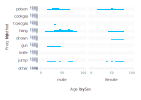

In [35]:
# grouped data.
p = plot(Data7, xgroup="Sex", ygroup="Method", x="Age", y="Freq", Geom.subplot_grid(Geom.bar))

In [36]:
draw(SVG("myplot.svg", 14cm, 25cm), p)  # to save in other formats use pkg Cairo and Fontconfig.

In [37]:
# contour
volcano = convert(Array,(dataset("datasets","volcano")))

87x61 Array{Int64,2}:
 100  100  101  101  101  101  101  100  …  106  106  105  105  104  104  103
 101  101  102  102  102  102  102  101     107  106  106  105  105  104  104
 102  102  103  103  103  103  103  102     107  107  106  106  105  105  104
 103  103  104  104  104  104  104  103     108  107  107  106  106  105  105
 104  104  105  105  105  105  105  104     108  107  107  107  106  106  105
 105  105  105  106  106  106  106  105  …  108  108  108  107  107  106  106
 105  106  106  107  107  107  107  106     109  109  108  108  107  107  106
 106  107  107  108  108  108  108  107     110  109  109  108  108  107  106
 107  108  108  109  109  109  109  108     110  110  109  109  108  107  107
 108  109  109  110  110  110  110  109     111  110  110  109  108  107  107
 109  110  110  111  111  111  111  110  …  112  111  110  109  108  107  106
 110  110  111  113  112  111  113  112     113  111  110  109  108  107  106
 110  111  113  115  114  113  114  114   

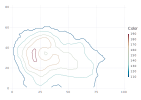

In [38]:
plot(z=volcano, Geom.contour(levels=[110, 130, 150, 170, 190]))
# arguments(optional): levels: it could be either an array of contour levels, or the number of levels to plot.
# plot(z=volcano, Geom.contour(levels=5))
# plot(z=volcano, Geom.contour(levels=[110, 130, 150, 170, 190]))

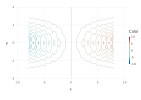

In [39]:
# contour also works for functions!!
plot(z=(x,y) -> x*exp(-(x-round(Int, x))^2-y^2), x=linspace(-8,8,150), y=linspace(-2,2,150), Geom.contour)

### Advantages and Disadvantages

#### Advantages
1. Nice plots.
2. Great to display data.

#### Disadvantages
1. A bit slow.
2. 3D graphs?
3. ggplot2 is not completely implemented, e.g. there is no polar plots in Gadfly

### References

[1] [Gadfly Github page](http://dcjones.github.io/Gadfly.jl/) and [this](https://github.com/dcjones/Gadfly.jl)  
[2] https://en.wikibooks.org/wiki/Introducing_Julia/Plotting  
[3] *The Grammar of Graphics (2005)*, Leland Wilkinson.  
[4] *ggplot2: Elegant Graphics for Data Analysis (2009)*, Hadley Wickham.  
[5] *ggplo2 Essentials (2015)*, Donato Teutonico.  
[6] *R graphics cookbook (2013)*, Winston Chang  